<a href="https://colab.research.google.com/github/elizabethyoo/team_9/blob/EDA_linegraphs/OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from matplotlib import animation as animation
import matplotlib.dates as mdates

from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import operator


pd.set_option('display.float_format', lambda x: '%.4f' % x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/MyDrive/group_9/Datasets/hps_sbps_unemp_vac.csv', index_col='Date')
df_no_peak = df[(df.index<'2020-10-31') | (df.index >'2021-02-28')] 

# peak winter cases df
df_peak = df[~((df.index<'2020-10-31') | (df.index >'2021-02-28'))]

In [4]:
col_to_drop = ['year', 'month','tot_cases', 'tot_death','population_size','total_deaths_per_1_mill_pop',
       'total_cases_per_1_mill_pop','Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65PlusPop_Pct', 
       'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
       'Series_Complete_65PlusPop_Pct', 'Additional_Doses_Vax_Pct',
       'Additional_Doses_18Plus_Vax_Pct', 'Additional_Doses_50Plus_Vax_Pct',
       'Additional_Doses_65Plus_Vax_Pct','female','state',
       'childcare_issue', 'financial_stress', 'market_challenges',
       'markets_challenges','operational_challenges','new_case', 'new_death','overall_sentiment']


df_to_model = df.drop(columns=col_to_drop)  
df_no_peak = df_no_peak.drop(columns=col_to_drop)  
df_peak = df_peak.drop(columns=col_to_drop) 
df_peak['new_cases_per_1_mill_pop'] = df_no_peak['new_cases_per_1_mill_pop'].mean()
df_to_model['Series_Complete_Pop_Pct'] = df_to_model['Series_Complete_Pop_Pct'].fillna(0)

In [5]:
df_to_model.head(2)

,age_18_24,age_25_39,age_40,age_50,age_60,age_70_up,child,education_bachelor,education_hs,education_less_hs,education_associate,income_100K,income_150K,income_200K,income_25K,income_35K,income_50K,income_75K,income_less_25K,race_other,race_asian,race_black,race_white,food_scarcity,housing_insecurity,male,hispanic_origin,expected_recovery,unemployment_rate,new_cases_per_1_mill_pop,new_deaths_per_1_mill_pop,fatality_rate,Series_Complete_Pop_Pct
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-30,9.7022,34.3529,14.8741,16.0768,15.0907,9.9033,0.0000,27.5564,36.0829,1.2940,35.0667,15.1546,5.9602,6.5873,9.6292,9.7133,17.4755,14.2922,8.2719,22.1747,6.9447,2.8202,68.0603,7.4137,1.9379,51.1094,6.4097,-0.5900,12.4000,310.4664,4.1031,3.0277,0.0000
2020-05-31,9.7347,32.9765,15.5323,16.5215,14.8570,9.7349,0.6431,27.5405,36.2782,1.1069,35.0744,13.8033,7.9779,5.6725,7.4605,8.4605,17.6799,12.3827,13.4845,24.0058,5.1436,2.1758,68.6748,6.9246,2.5193,51.1094,6.2471,-0.5940,12.0000,147.7109,5.4708,2.6981,0.0000


In [6]:
X = df_to_model.drop(columns='expected_recovery')
y = df_to_model.loc[:,'expected_recovery']

scaler = MinMaxScaler()
X_transformed = scaler.fit_transform(X)

# Sklearn

In [7]:
model = Ridge()
model.fit(X_transformed, y)
coef = pd.DataFrame(zip(X.columns,model.coef_ ), columns = ['Features', 'Coef'])

# Coef didn't have any p-value

#Statmodel

In [8]:
X_transformed_sm = pd.DataFrame(X_transformed, columns= X.columns)
X_transformed_sm.set_index(y.index, inplace=True)

X_transformed_sm = sm.add_constant(X_transformed_sm)
model = sm.OLS(y, X_transformed_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      expected_recovery   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     92.16
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          2.87e-238
Time:                        22:42:51   Log-Likelihood:                 1628.7
No. Observations:                 800   AIC:                            -3191.
Df Residuals:                     767   BIC:                            -3037.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [9]:
# X_transformed_sm = sm.add_constant(X_transformed_sm)
# model = sm.OLS(y, X_transformed_sm)
# results_reg = model.fit_regularized(method='sqrt_lasso', alpha=0.2, L1_wt=0.0)
# print(results_reg.summary())

# Withheld peak cases data period


In [10]:
df_no_peak.index.unique()

Index(['2020-04-30', '2020-05-31', '2020-06-30', '2020-08-31', '2020-09-30',
       '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
       '2021-08-31'],
      dtype='object', name='Date')

In [11]:
df_to_model = df_no_peak.drop(columns= ['Series_Complete_Pop_Pct','new_deaths_per_1_mill_pop','fatality_rate'])

X_no_peak = df_to_model.drop(columns='expected_recovery')
y_no_peak = df_to_model.loc[:,'expected_recovery']

scaler = MinMaxScaler()
X_transformed_no_peak = scaler.fit_transform(X_no_peak)

In [12]:
X_transformed_no_peak_sm = pd.DataFrame(X_transformed_no_peak, columns= X_no_peak.columns)
X_transformed_no_peak_sm.set_index(y_no_peak.index, inplace=True)

X_transformed_no_peak_sm = sm.add_constant(X_transformed_no_peak_sm)
model_no_peak = sm.OLS(y_no_peak, X_transformed_no_peak_sm)
results_peak = model_no_peak.fit()
print(results_peak.summary())

                            OLS Regression Results                            
Dep. Variable:      expected_recovery   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     42.58
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          1.03e-117
Time:                        22:42:53   Log-Likelihood:                 976.48
No. Observations:                 550   AIC:                            -1893.
Df Residuals:                     520   BIC:                            -1764.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [13]:
pred_X_train =  results_peak.predict(X_transformed_no_peak_sm)

In [14]:
pred_X_train

Date
2020-04-30   -0.5856
2020-05-31   -0.5745
2020-06-30   -0.5874
2020-08-31   -0.5320
2020-09-30   -0.5330
               ...  
2021-04-30   -0.3918
2021-05-31   -0.3997
2021-06-30   -0.3877
2021-07-31   -0.3528
2021-08-31   -0.4217
Length: 550, dtype: float64

In [15]:
X_test = df_peak.drop(columns='expected_recovery').drop(columns= ['Series_Complete_Pop_Pct','new_deaths_per_1_mill_pop','fatality_rate'])
y_test = df_peak.loc[:,'expected_recovery']

X_test_transformed = scaler.fit_transform(X_test)
X_test_transformed_sm = pd.DataFrame(X_test_transformed, columns= X_test.columns,index=y_test.index)


X_test_transformed_sm = sm.add_constant(X_test_transformed_sm)
y_test_pred = results_peak.predict(X_test_transformed_sm)

In [16]:
y_test_pred.describe()

count        250.0000
mean    -1162029.7405
std       347863.9382
min     -2452831.3902
25%     -1391981.2181
50%     -1070653.6705
75%      -940322.9541
max      -511503.1918
dtype: float64

In [17]:
X_test_transformed_sm['predicted_eri'] = y_test_pred
predicted_eri = pd.DataFrame(y_test_pred, columns=['predicted_eri'], index=y_test.index)

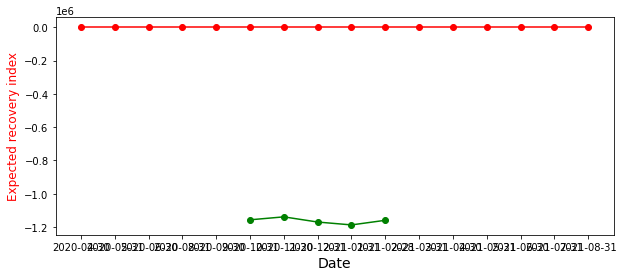

In [18]:
title = 'Expected recovery index & New Cases Per Million Population: '
fig,ax = plt.subplots(figsize =(10,4))
ax.plot(df.groupby(df.index)['expected_recovery'].mean(), color="red", marker="o")
ax.plot(predicted_eri.groupby(predicted_eri.index)['predicted_eri'].mean(), color="green", marker="o")
ax.set_xlabel("Date",fontsize=14)
# ax.set_ylim([-0.8,-0.22])
ax.set_ylabel('Expected recovery index',color="red",fontsize=12)

# fmt_month = mdates.MonthLocator()
# ax.xaxis.set_minor_locator(fmt_month)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# ax2=ax.twinx()
# ax2.plot(df.groupby(df.index)['new_cases_per_1_mill_pop'].mean(), color="blue", marker="o")
# ax2.set_ylabel('New Cases Per Million Population',color="blue",fontsize=12)
# # ax2.set_ylim([20,46000])
# plt.title(title + 'National level', fontsize=16)
# rect =ax.axvspan('2021-06-30', '2021-08-31', alpha=0.5)
# ax.legend([rect], ['COVID-19 \nDelta Variant Wave'], loc=2)
# fig.autofmt_xdate()
plt.show()

## without minmax scaler

In [19]:
df_to_model = df_no_peak.drop(columns=['Series_Complete_Pop_Pct','new_deaths_per_1_mill_pop','fatality_rate'])
X_no_peak = df_to_model.drop(columns='expected_recovery')
y_no_peak = df_to_model.loc[:,'expected_recovery']

# X_no_peak = sm.add_constant(X_no_peak)
model_no_peak = sm.OLS(y_no_peak, X_no_peak)
results_no_peak = model_no_peak.fit()
print(results_no_peak.summary())

                            OLS Regression Results                            
Dep. Variable:      expected_recovery   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     44.12
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          1.95e-118
Time:                        22:43:00   Log-Likelihood:                 976.21
No. Observations:                 550   AIC:                            -1894.
Df Residuals:                     521   BIC:                            -1769.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age_18_24               

In [20]:
X_no_peak_pred = results_no_peak.predict(X_no_peak)

In [21]:
X_no_peak_pred[:5]

Date
2020-04-30   -0.5851
2020-05-31   -0.5749
2020-06-30   -0.5880
2020-08-31   -0.5324
2020-09-30   -0.5313
dtype: float64

In [22]:
df_to_test = df_peak.drop(columns=['Series_Complete_Pop_Pct','new_deaths_per_1_mill_pop','fatality_rate'])
X_test = df_to_test.drop(columns='expected_recovery')
y_test = df_to_test.loc[:,'expected_recovery']
# X_test = sm.add_constant(X_test)
y_test_pred = results_no_peak.predict(X_test)

In [23]:
y_test_pred

Date
2020-10-31   -0.5622
2020-11-30   -0.5531
2020-12-31   -0.5498
2021-01-31   -0.5282
2021-02-28   -0.5322
               ...  
2020-10-31   -0.4741
2020-11-30   -0.4644
2020-12-31   -0.4866
2021-01-31   -0.4538
2021-02-28   -0.4250
Length: 250, dtype: float64

In [24]:
predicted_eri = pd.DataFrame(y_test_pred, columns=['predicted_eri'], index=y_test.index)
predicted_eri.reset_index(inplace=True)

In [25]:
predicted_eri.loc[predicted_eri['Date']=='2020-10-31', 'predicted_eri'] = df[df.index=='2020-10-31']['expected_recovery'].values

In [26]:
predicted_eri.set_index('Date', inplace=True)
predicted_eri.groupby(predicted_eri.index)['predicted_eri'].mean()

Date
2020-10-31   -0.5250
2020-11-30   -0.5027
2020-12-31   -0.5142
2021-01-31   -0.4971
2021-02-28   -0.4847
Name: predicted_eri, dtype: float64

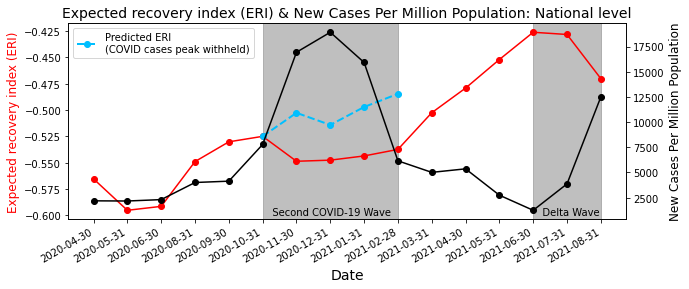

In [27]:
title = 'Expected recovery index (ERI) & New Cases Per Million Population: '
fig,ax = plt.subplots(figsize =(10,4))
p1, = ax.plot(df.groupby(df.index)['expected_recovery'].mean(), color="red", marker="o")
p2, = ax.plot(predicted_eri.groupby(predicted_eri.index)['predicted_eri'].mean(), 
              color="deepskyblue", marker="o", linewidth=2, linestyle = '--',
              label='Predicted ERI \n(COVID cases peak withheld)')
ax.set_xlabel("Date",fontsize=14)

ax.set_ylabel('Expected recovery index (ERI)',color="red",fontsize=12)

fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2=ax.twinx()
p3, = ax2.plot(df.groupby(df.index)['new_cases_per_1_mill_pop'].mean(), color="black", marker="o", label = 'New cases per 1 million')
ax2.set_ylabel('New Cases Per Million Population',color="black",fontsize=12)

plt.title(title + 'National level', fontsize=14)
rect =ax.axvspan('2020-10-31', '2021-02-28', alpha=0.5, color = 'grey')
rect2 =ax.axvspan('2021-06-30', '2021-08-31', alpha=0.5, color = 'grey')
ax.annotate('   Second COVID-19 Wave', ('2020-10-31', -.6))
ax.annotate('   Delta Wave', ('2021-06-30', -.6))

handles, labels = ax.get_legend_handles_labels()

# reverse the order
ax.legend(handles[::-1], labels[::-1])

# or sort them by labels

hl = sorted(zip(handles, labels),
            key=operator.itemgetter(1))
handles2, labels2 = zip(*hl)

ax.legend(handles2, labels2)
fig.autofmt_xdate()
plt.show()

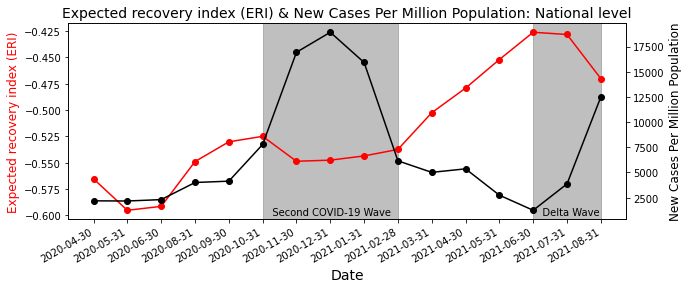

In [29]:
title = 'Expected recovery index (ERI) & New Cases Per Million Population: '
fig,ax = plt.subplots(figsize =(10,4))
p1, = ax.plot(df.groupby(df.index)['expected_recovery'].mean(), color="red", marker="o")
# p2, = ax.plot(predicted_eri.groupby(predicted_eri.index)['predicted_eri'].mean(), 
              # color="deepskyblue", marker="o", linewidth=2, linestyle = '--',
              # label='Predicted ERI \n(COVID cases peak withheld)')
ax.set_xlabel("Date",fontsize=14)

ax.set_ylabel('Expected recovery index (ERI)',color="red",fontsize=12)

fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2=ax.twinx()
p3, = ax2.plot(df.groupby(df.index)['new_cases_per_1_mill_pop'].mean(), color="black", marker="o", label = 'New cases per 1 million')
ax2.set_ylabel('New Cases Per Million Population',color="black",fontsize=12)

plt.title(title + 'National level', fontsize=14)
rect =ax.axvspan('2020-10-31', '2021-02-28', alpha=0.5, color = 'grey')
rect2 =ax.axvspan('2021-06-30', '2021-08-31', alpha=0.5, color = 'grey')
ax.annotate('   Second COVID-19 Wave', ('2020-10-31', -.6))
ax.annotate('   Delta Wave', ('2021-06-30', -.6))

# handles, labels = ax.get_legend_handles_labels()

# reverse the order
# ax.legend(handles[::-1], labels[::-1])

# or sort them by labels

# hl = sorted(zip(handles, labels),
#             key=operator.itemgetter(1))
# handles2, labels2 = zip(*hl)

# ax.legend(handles2, labels2)
fig.autofmt_xdate()
plt.show()